In [83]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense

In [84]:
#!wget https://raw.githubusercontent.com/JasonMorris1/CSE151_Tesla_Stock_Prediction/main/tsla_2014_2023.csv
df = pd.read_csv('tsla_2014_2023.csv')
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.drop(columns=['open', 'high', 'low', 'close', 'macd']) # not sure why we do this
#df = df.drop(columns=['sma_50', 'sma_100', 'rsi_7', 'ema_50', 'atr_7'], axis=1)

df.head()




,date,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,bollinger,TrueRange,atr_7,atr_14,next_day_close,year
0,2014-01-02,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,9.740800,0.395333,0.402641,0.447550,9.970667,2014
1,2014-01-03,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,9.776167,0.239333,0.379311,0.432677,9.800000,2014
2,2014-01-06,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,9.797900,0.344000,0.374267,0.426343,9.957333,2014
3,2014-01-07,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,9.837900,0.343334,0.369848,0.420414,10.085333,2014
4,2014-01-08,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,9.870167,0.329334,0.364060,0.413908,9.835333,2014


In [85]:
# df_train=df[(df.year<2023) & (df.year>2017)]
# df_test=df[df.year==2023]

df_train=df[(df.year<2022)]
df_test=df[(df.year >=2022)]


X_train=df_train.drop(['date','year','next_day_close'],axis=1)
X_test=df_test.drop(['date','year','next_day_close'],axis=1)
##
y_train=df_train['next_day_close']
y_test=df_test['next_day_close']

X_train_date = df_train['date']
X_test_date = df_test['date']

print(X_train.columns)

Index(['volume', 'rsi_7', 'rsi_14', 'cci_7', 'cci_14', 'sma_50', 'ema_50',
       'sma_100', 'ema_100', 'bollinger', 'TrueRange', 'atr_7', 'atr_14'],
      dtype='object')


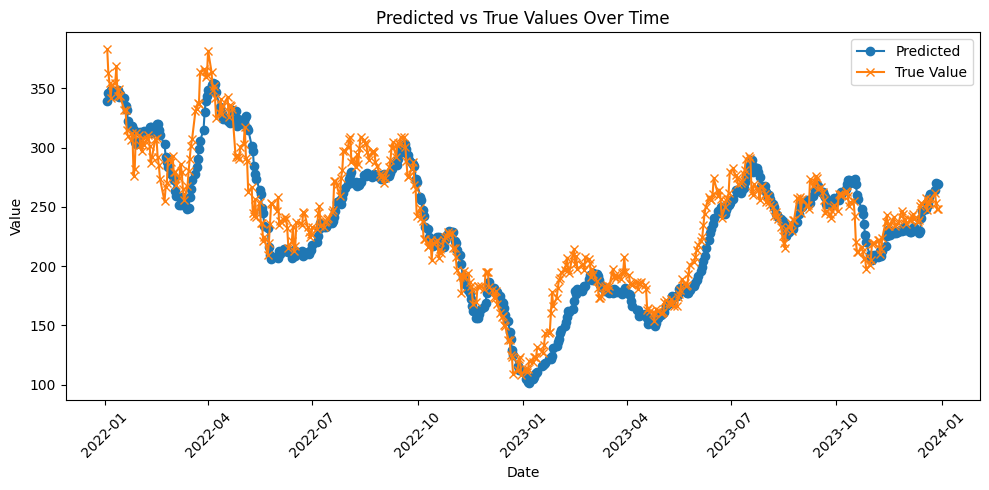

            true   predicted
2015  383.196655  339.419747
2016  362.706665  346.116913
2017  354.899994  346.453990
2018  342.320007  348.448181
2019  352.706665  344.033447
...          ...         ...
2511  256.609985  260.539008
2512  261.440002  264.455054
2513  253.179993  270.156539
2514  248.479996  268.955125
2515  248.419998  268.957302

[501 rows x 2 columns]
mse: 393.89
mae: 15.58


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# X_train_scaled.shape, X_test_scaled.shape


# print(X_train_scaled)
# print(y_train)
from sklearn.metrics import classification_report

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(X_test_date, y_pred, label='Predicted', marker='o')  # Plot predicted values

#plt.plot(X_test_date, y_test, label='True Value', marker='x')  # Plot true values
#x3,y3 = zip(*sorted(zip(X_test_date, y_test),key=lambda x: x[0]))
plt.plot(X_test_date, y_test, label='True Value', marker='x')  # Plot true values


# Adding titles and labels
plt.title('Predicted vs True Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Adding a legend
plt.legend()

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#print(y_pred.shape)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

df_result = pd.DataFrame()
df_result['true']= y_test
df_result['predicted']= y_pred

print(df_result)
print(f"mse: {mse:.2f}")
print(f"mae: {mae:.2f}")


In [87]:
#print(linreg.coef_)
#print(X_test.columns)

df_coef = pd.DataFrame(linreg.coef_.reshape(1, 13), columns=X_test.columns)

print(df_coef.head())

         volume     rsi_7    rsi_14     cci_7    cci_14    sma_50    ema_50  \
0  8.899214e-09  0.158452 -0.008731  0.008581 -0.002986 -3.472734  9.327192   

    sma_100   ema_100  bollinger  TrueRange     atr_7    atr_14  
0 -1.080258 -1.472524  -2.231612  -0.333793  4.255921 -5.736533  
